In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ATBD DOCUMENT
# https://docs.google.com/document/d/1USfdqsDzEHKh2TxMlh3_r3Xbkjeg2NBMDaRsQtngPck/edit?usp=sharing

In [2]:
output_dir = '/home/robbie/uit_mnt/home/romal7177/arctex/ice_cover/outputs/'

In [3]:
x = h5py.File(f'{output_dir}austfonna_Cover.h5')
x.keys()

<KeysViewHDF5 ['rad_thresh_100_10pc', 'rad_thresh_100_20pc', 'rad_thresh_100_30pc', 'rad_thresh_100_40pc', 'rad_thresh_100_50pc', 'rad_thresh_100_60pc', 'rad_thresh_100_70pc', 'rad_thresh_100_80pc', 'rad_thresh_100_90pc', 'rad_thresh_200_10pc', 'rad_thresh_200_20pc', 'rad_thresh_200_30pc', 'rad_thresh_200_40pc', 'rad_thresh_200_50pc', 'rad_thresh_200_60pc', 'rad_thresh_200_70pc', 'rad_thresh_200_80pc', 'rad_thresh_200_90pc', 'rad_thresh_300_10pc', 'rad_thresh_300_20pc', 'rad_thresh_300_30pc', 'rad_thresh_300_40pc', 'rad_thresh_300_50pc', 'rad_thresh_300_60pc', 'rad_thresh_300_70pc', 'rad_thresh_300_80pc', 'rad_thresh_300_90pc', 'rad_thresh_400_10pc', 'rad_thresh_400_20pc', 'rad_thresh_400_30pc', 'rad_thresh_400_40pc', 'rad_thresh_400_50pc', 'rad_thresh_400_60pc', 'rad_thresh_400_70pc', 'rad_thresh_400_80pc', 'rad_thresh_400_90pc', 'rad_thresh_500_10pc', 'rad_thresh_500_20pc', 'rad_thresh_500_30pc', 'rad_thresh_500_40pc', 'rad_thresh_500_50pc', 'rad_thresh_500_60pc', 'rad_thresh_500_70p

In [5]:
df = pd.read_hdf(f'{output_dir}austfonna_Cover.h5',
                 key=f'rad_thresh_300_40pc')
df.head()

,year,all_days_OW,DJF_days_OW
0,2003,72,0
1,2004,136,0
2,2005,123,3
3,2006,289,38
4,2007,198,40


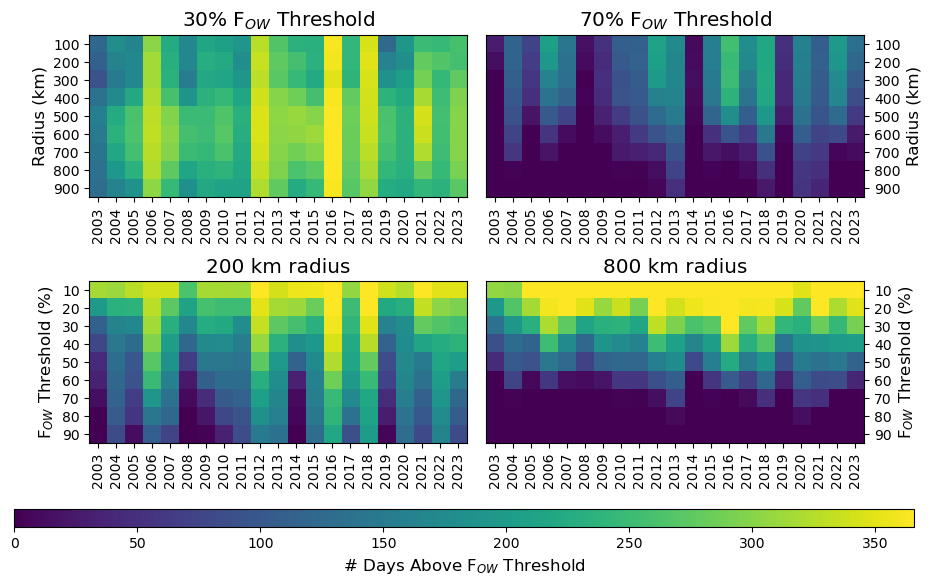

In [37]:
fig, axs = plt.subplots(2,2,figsize=(10,6))

ax1,ax2,ax3,ax4=axs.reshape(-1)

radii = np.arange(100,1000,100)

for ow_frac,ax in zip([30,70],[ax1,ax2]):
    
    list_of_lists = []
    
    for rad in radii:
        
        df = pd.read_hdf(f'{output_dir}austfonna_Cover.h5',
                         key=f'rad_thresh_{rad}_{ow_frac}pc')
    
    
        ow = np.array(df['all_days_OW'])
    
    
        list_of_lists.append(ow)
    
    array = np.array(list_of_lists)
    
    x = ax.imshow(array,vmin=0,vmax=365)
    
    now = 'N$_{OW}$'
    fow = 'F$_{OW}$'
    
    # cb = plt.colorbar(x,orientation='horizontal')
    
    # cb.set_label(f'# Days Above {ow_frac}% {fow} Threshold ({now})',fontsize='large')
    
    
    ax.set_xticks(ticks=np.arange(array.shape[1]))
    ax.set_xticklabels(np.arange(2003,2024),rotation=90)
    
    ax.set_yticks(ticks=np.arange(array.shape[0]))
    ax.set_yticklabels(radii, rotation=0)
    
    ax.set_ylabel('Radius (km)',fontsize='large')

    ax.set_title(f'{ow_frac}% {fow} Threshold',fontsize='x-large')

thresholds = np.arange(10,91,10)

for rad,ax in zip([200,800],[ax3,ax4]):
    
    list_of_lists = []
    
    for thresh in thresholds:
        
        df = pd.read_hdf(f'{output_dir}austfonna_Cover.h5',
                         key=f'rad_thresh_{rad}_{thresh}pc')
    
    
        ow = np.array(df['all_days_OW'])
    
    
        list_of_lists.append(ow)
    
    array = np.array(list_of_lists)
    
    x = ax.imshow(array)
    
    # cb = plt.colorbar(x,orientation='horizontal')
    # cb.set_label(f'# Days Above {fow} Threshold',fontsize='large')
    
    
    ax.set_xticks(ticks=np.arange(array.shape[1]))
    ax.set_xticklabels(np.arange(2003,2024),rotation=90)
    
    ax.set_yticks(ticks=np.arange(array.shape[0]))
    ax.set_yticklabels(thresholds,rotation=0)
    
    ax.set_ylabel(f'{fow} Threshold (%)',fontsize='large')
    
    ax.set_title(f'{rad} km radius',fontsize='x-large')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

ax4.yaxis.tick_right()
ax4.yaxis.set_label_position('right')



plt.subplots_adjust(hspace=0.05,wspace=0.05)
fig.subplots_adjust(bottom=0.08)
cbar_ax = fig.add_axes([0.05, 0.0, 0.9, 0.03])#left,bottom,width,height
cb = fig.colorbar(x, cax=cbar_ax,orientation='horizontal',pad=20)
cb.set_label(f'# Days Above {fow} Threshold',fontsize='large')

plt.savefig('figures/now_heatmaps.png',dpi=500,bbox_inches='tight')

plt.show()